## Data importing and preprocessing

In [1]:
#Importing all of the needed packages and functions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [2]:
#import the dataset into a variable using pandas
bills = pd.read_csv("fake_bills.csv")

# **Data cleaning**

In [3]:
#check for null values and we see we have a problem with our dataframe so we investigate further
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length  1500 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


In [4]:
#something seems to be wrong so we check the shape of the dataframe
bills.shape

(1500, 1)

In [5]:
#Checking the dataframe we can see that everything seems to be all close together hold by delimiter ";"
bills.head()

,is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
0,True;171.81;104.86;104.95;4.52;2.89;112.83
1,True;171.46;103.36;103.66;3.77;2.99;113.09
2,True;172.69;104.48;103.5;4.4;2.94;113.16
3,True;171.36;103.91;103.94;3.62;3.01;113.51
4,True;171.73;104.28;103.46;4.04;3.48;112.54


In [6]:
#We now check the values of each array vector and such
bills.values

array([['True;171.81;104.86;104.95;4.52;2.89;112.83'],
       ['True;171.46;103.36;103.66;3.77;2.99;113.09'],
       ['True;172.69;104.48;103.5;4.4;2.94;113.16'],
       ...,
       ['False;171.8;104.01;104.12;5.51;3.36;111.95'],
       ['False;172.06;104.28;104.06;5.17;3.46;112.25'],
       ['False;171.47;104.15;103.82;4.63;3.37;112.07']], dtype=object)

In [7]:
#We first fix the rows of the dataframe and fill them in while also splitting them for further indexing
rows = []
for i in range(bills.shape[0]):
    rows.append(bills.loc[i].str.split(";").values)

In [8]:
#We will now see the amount of rows we have made
len(rows)

1500

In [9]:
#Now we have to fix the columns to get their names to later insert into a dataframe
cols = bills.columns.str.split(';')
cols

Index([['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']], dtype='object')

In [10]:
#Now I will create a function that abstracts the column info of each column and then fils them in
def col_info(n):
    info = []
    for i in range(len(rows)):
        info.append(rows[i][0][n])
        
    return info

In [11]:
#we now extract the information of the columns to later use to input into a dataframe
col_1 = col_info(0)
col_2 = col_info(1)
col_3 = col_info(2)
col_4 = col_info(3)
col_5 = col_info(4)
col_6 = col_info(5)
col_7 = col_info(6)

In [12]:
#We now create a dataframe that is aligned with the information extracted from the csv file
bills = pd.DataFrame({ "is_genuine":col_1,
              "diagonal": col_2,
              "height_left":col_3,
              "height_right": col_4,
              "margin_low":col_5,
              "margin_up":col_6,
              "length":col_7
})

In [13]:
#We will change the datatypes later
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_genuine    1500 non-null   object
 1   diagonal      1500 non-null   object
 2   height_left   1500 non-null   object
 3   height_right  1500 non-null   object
 4   margin_low    1500 non-null   object
 5   margin_up     1500 non-null   object
 6   length        1500 non-null   object
dtypes: object(7)
memory usage: 82.2+ KB


In [14]:
#get the overall feel of the dataframe
bills.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.5,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [15]:
#Transforming the is_genuine column into a dummy variable since computers better operate with numbers and it will be easier for the model
bills["is_genuine"] = bills.apply(lambda x: 1 if x.is_genuine == "True" else 0, axis= 1)

In [16]:
#here we change the datatypes
#We now have to update the columns to numeric or their correct datatype
bills["diagonal"] = pd.to_numeric(bills["diagonal"])
bills["height_left"] = pd.to_numeric(bills["height_left"])
bills["height_right"] = pd.to_numeric(bills["height_right"])
bills["margin_low"] = pd.to_numeric(bills["margin_low"])
bills["margin_up"] = pd.to_numeric(bills["margin_up"])
bills["length"] = pd.to_numeric(bills["length"])


In [17]:
#Here we can see that margin_low row does not have the same amounf of non null values implying that there is some sort of missing values in the column
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [18]:
#Here we can see that we have 37 missing values in the dataset
bills.isnull().sum()


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [19]:
#We will now fill in the missing values with the mean amount of margin_low in the data instead of deleting them 
bills['margin_low'].fillna(bills['margin_low'].mean(),inplace = True)

In [20]:
#we checked if it worked and it did. we got no more null values
bills.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# **Splitting the dataset: choosing x and y**

In [21]:
#Now we chose the x and y values in this case we want to set the dependent variable to if the bill is genuiene or not so thats our y
#The x will be everything but the the dependent variable since we want to classify based on the bil attributes
x = np.array(bills.drop("is_genuine", axis=1))
y = np.array(bills["is_genuine"])

In [22]:
#we now train_test and split the model. I chose .30 test_size since it is a better idea to have a bigger train size for KNN since the larger the test set
# The slower the model willl run it 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=0)

# **Building of KNNclassifier model/ fitting**

In [23]:
#We now build the model and chose the amount of neighbors we would like to use. A safe practice would be to use from around 3 to 5 neighbors
#Here we also fit the model
KNN_model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

Prediction portion of the model and evaluation

In [24]:
#Here we check the accuracy of the training portion of the data with the model which is pretty goood
KNN_model.score(x_train,y_train)

0.9923809523809524

In [25]:
#Inserting the new values we can see that it does classify well with the addition of new values and it seems to slightly improve
KNN_model.score(x_test,y_test)

0.9933333333333333

# **Predictions of the model**

In [26]:
#We will now see how the predictions work on the training set
y_pred = KNN_model.predict(x_train)

In [27]:
#Now we get the prediciton of new and unseen data
y_pred_test = KNN_model.predict(x_test)

# **Model evaluation for accuracy**

In [28]:
#we will now generate a classification report. We should use the test portion
cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       1.00      0.99      0.99       293

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [29]:
#We check the shape of the test portion to see the amount of rows it has 
y_test.shape

(450,)

In [30]:
#Here we can see that out of the new data presented 156 are true positives, 1 is a false positive, 2 is a false negative and 291 are true negative
# Which is overall really really good
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[156,   1],
       [  2, 291]], dtype=int64)

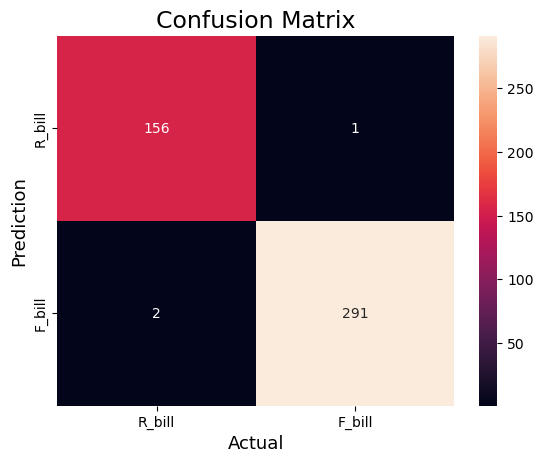

In [31]:
#Plotting the confusion matrix
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['R_bill','F_bill'],
            yticklabels=['R_bill','F_bill'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [32]:
#Here is another way to check for accuracy besides using the classification report
accuracy_KNN = accuracy_score(y_test, y_pred_test)

In [33]:
#we now look at the accuracy of the KNN model unseen data 
accuracy_KNN

0.9933333333333333

In [34]:
#Root mean square error of the training portion. There is a difference of 0.09 on average when it comes to the predicted vs actual bills
mse_train = mean_squared_error(y_train,y_pred)
rmse_train = np.sqrt(mse_train)
rmse_train

0.08728715609439695

In [35]:
#Now we see if we have the same or better resukts for the new unseen test data. Turns out we have a 0.8 which although is a small difference it is better
# Than the training portion of unseen data
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.sqrt(mse_test)
rmse_test

0.08164965809277261